# Image Analysis Using Machine Learning

## What is Machine Learning?

Most computer programs and algorithms come down to making decision problems. Do I turn left now? Is that a cat or is it a donkey?

Some of these problems can be solved by humans writing programs, but some of them are too complicated to even know where to begin, such as flying a helicopter or driving a car. There are too many rules and details to capture and encode in a human-writen program. In some of these cases, it is often better to have a machine observe, learn and generate their own models or algorithms to solve these complex problems.

Machine learning is exactly that: having a computer decide problems that are too complex for a human to encode by hand.

<img src="https://www.expert.ai/wp-content/uploads/2017/03/machine-learning-definition.jpeg" width="100%"/>


## What problems can Machine Learning solve?

Machine learning can solve pretty much any problem that requires decision making, which is just about every problem that is important. The trick is to have enough observations for it to adequately learn an adequate decision model. Millions of hours of actual human driving time has gone into training machines to drive.

<img src="https://media.wired.com/photos/5e7b7a0fadfa9d0008e095b2/191:100/w_2400,h_1256,c_limit/Transpo-selfdrivingcar-1158000221.jpg" width="40%"/>


Many of these problems fall into buckets, or types of modelling problems. For example, "is it a cat or a donkey" is a classification problem, whereas "turning left" can be modeled as a regression problem depending on how hard of a left to take.

<img src="https://i.pinimg.com/originals/6d/ba/45/6dba45132268f90b6b53722052318457.jpg" width="40%"/>


# Handwriting Analysis: predicting digits
We're going to train a robot to read your handwriting. We'll keep it simple, and have the machine guess what number you draw. This is a classification problem. There are 10 digits (0 through 9) or classes we want the computer to guess correctly. The idea sort of goes like this:



1.   Dear Computer, please study these examples of hand-written digits:

<img src="https://i1.wp.com/dataaspirant.com/wp-content/uploads/2017/05/Mnist-database-hand-written-digits.png?resize=530%2C297" width="50%"/>

2.   Now, make a guess. What are these?

<img src="https://blog.otoro.net/assets/20160401/png/mnist_input_0.png" width="15%"/>

That's a FIVE!

<img src="https://miro.medium.com/max/282/1*xpszL7jJrV5UTV7Xa-fgWQ.png" width="15%"/>

That's a FOUR!

<img src="https://svgsilh.com/svg_v2/3023921.svg" width="15%"/>

That's a SEVEN!

.... oops! Is it?

## Install libraries
In order to create this machine learning model, we will only use 2 libraries! Each library has a lot of tools for our disposal. 

The important Machine Learning libraries are:

*   sklearn - common package of machine learning tools ("sci-kit learn")
*   tensorflow - a library from Google for advanced machine learning

**Tidbit factoid**: a *tensor* is a mathematical structure, important in linear algebra, that allows you to manipulate and compute very large "shapes of data" efficiently and smoothly. It's quite complex and advanced math, but you can read more about it if you Google it. We're just going to use it. TensorFlow has become really popular since about 2015.

In [ ]:
!pip install sklearn
!pip install tensorflow
!pip install matplotlib
!pip install numpy

## Make imports

In [ ]:
# Sklearn imports - used to load database
from sklearn import datasets

# Keras imports - used to train the model
import tensorflow as tf
from tensorflow import keras

# Plotting libraries
import matplotlib.pyplot as plt
# Set plots to be inline
%matplotlib inline

# Numpy!
import numpy as np

## Connect Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Image plotting function

We will use a dataset of 8x8 images of number 0 - 9.

`plot_image_matrix()` will simply plot images on a (rows, cols) grid to show what our dataset looks like. It is important to visualize our dataset so we know what to pass to our different Keras functions.

In [ ]:
def plot_image_matrix(images, cols, rows):
    '''Displays the images in matrix form (9x9 grid)'''

    grid_size = cols * rows

    images = images[:grid_size]

    fig = plt.figure()
    for n, image in enumerate(images):
      a = fig.add_subplot(3, np.ceil(grid_size/float(3)), n + 1)
      plt.imshow(image, cmap='gray')
      a.set_title('image of: ' + str(n))

    fig.tight_layout(pad=0.04)
    fig.set_size_inches(np.array(fig.get_size_inches()) * grid_size//5)
    plt.show()

# Lets take a look at our data

We plot nine of our images in a 3 x 3 grid

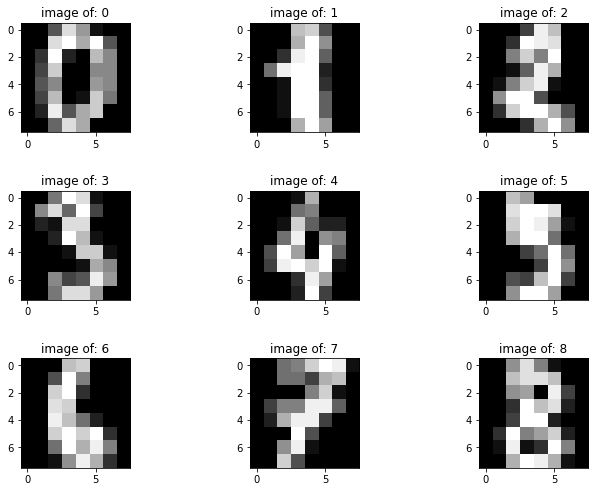

In [ ]:
# Load database for initial analysis
digits = datasets.load_digits()

# Data used to train our Machine Learning model
x_train = digits.data    # Contains samples
y_train = digits.target  # Contains labels

# Plot images
plot_image_matrix(digits.images, 3, 3)

Notice that our data contains the images, and above it, number that the image is supposed to represent. This is called **labeled data** where each sample (image) has a corresponding label (the number it represents). Labeled data is crucial for supervised learning which is what we are using.

We print the shape of our our data to get a better idea of what we are working with.

In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (1797, 64)
y_train shape: (1797,)


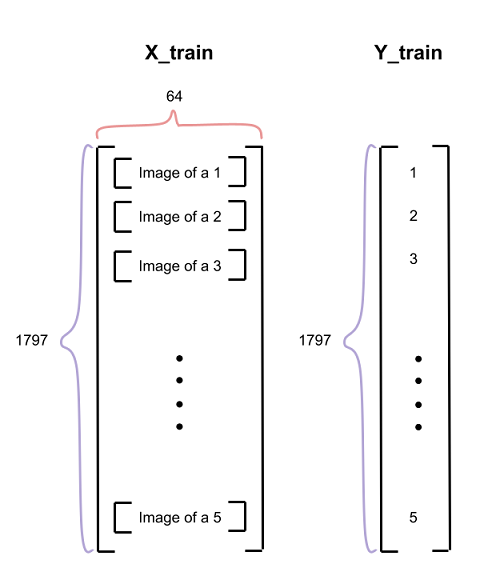

Because our images are 8 pixels by 8 pixels, each image contains a total of 64 pixels. Our data contains 1797 images.

## How can our computer learn to classify these images?

In order to teach computers to do learn and complete this daunting task on their own, we pull inspiration from our own brains!

<img src="https://qbi.uq.edu.au/files/24323/Axon-neuron-brain-QBI.jpg" width="50%"/>

Our brain has an average of 86 Billion of these neurons connected together into a large network!

<img src="https://4cawmi2va33i3w6dek1d7y1m-wpengine.netdna-ssl.com/wp-content/uploads/2018/12/2.0.jpeg" width="50%"/>



When trying to create intelligent machines, Computer scientists often attempt to mimic our brain by creating Artificial Neural Networks (ANNs)

<img src="https://miro.medium.com/max/2500/1*tWvofX1zZZnIHyHs-nKAfA.png" width="50%"/>


Similar to human and animals, machines learn from experience. As more and more images are passed into this artificial neural network, it begins to learn from its experience, becoming better at the task at hand. In general, the more data you have, the more experience the machine can get and the more it will learn.

# Building our Model


We need to make our neural network to train our model to learn the digits data. We will need this to predict what new data is (categorize it as 0 - 9).

The `Model.summary()` function gives a short view of what the model looks like. You do not have to worry about what trainable parameters are for this lesson.

The `keras.utils.plot_model()` function saves your model as an image in a specified location in your drive or computer.

https://playground.tensorflow.org/ - You can play around with neural networks and observe what the outcomes are for different types of data!

In [ ]:
# Make layers
x_in = keras.Input(shape=(64,), name='digits')
x = keras.layers.Dense(512, activation='relu', name='dense_1')(x_in)
x = keras.layers.Dense(512, activation='relu', name='dense_2')(x)
x = keras.layers.Dense(512, activation='relu', name='dense_3')(x)
x_out = keras.layers.Dense(10, activation='softmax', name='softmax')(x)

# Make a model
model = keras.Model(inputs=x_in, outputs=x_out)

model.summary()

'''This function is only for demonstration and should not be run'''
# * * * * * * * * * * * * * * * * * * * * #
# Plot the model to visualize it. We will # 
# * * * * * * * * * * * * * * * * * * * * #
# tf.keras.utils.plot_model(
#     model,
#     to_file="my_model.png",
#     show_shapes=False,
#     show_dtype=False,
#     show_layer_names=True,
#     rankdir="TB",
#     expand_nested=False,
#     dpi=96,
# )
# 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 64)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               33280     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
softmax (Dense)              (None, 10)                5130      
Total params: 563,722
Trainable params: 563,722
Non-trainable params: 0
_________________________________________________________________


'This function is only for demonstration and should not be run'

Here is what the `plot_model()` function would have saved if the function was run:

digits: input layer; where our images are passed into the neural network

dense_1: the first layer of neurons (nodes)

dense_2: the second layer of neurons (nodes)

dense_3: the third layer of neurons (nodes)

softmax: The final layer; what will categorize our data as 0 - 9


## Adjusting hyperparameters

You don't need to know exactly what these do yet, BUT these are important for training the model, and directly affect the outcome of your model as well

In [ ]:
# Hyperparameters
epochs = 40
batch_size = 128
validation_split = 0.2
test_split = 0.1

# Will be used later
validation_size = int(len(x_train) * validation_split)
test_size = int(len(x_train) * test_split)

## Making test and validation data sets

We want our model to be able to **generalize** to new data coming in. So, we need to test our model in real time, as it trains. This is so we can make it better able to generalize.

We will be making what are called **testing** and **validation** data sets. These sets are simply splitting the **training** data set into small parts.

The `validation_split` variable that you see in the above code block splits the training data set into two sets of 80% and 20%. We can choose any validation split we want, but we also need enough training data to train our model effectively. Typically 20% validation split is what is chosen.

In [ ]:
print('total size:', len(x_train))

# Test data
x_test = x_train[:test_size]
y_test = y_train[:test_size]
x_train, y_train = x_train[test_size:], y_train[test_size:] # Update x_train and y_train
print('test size:', len(x_test))

# Validation data
x_val = x_train[:validation_size]
y_val = y_train[:validation_size]
print('validation size:', len(x_val))

# Final training data
x_train, y_train = x_train[validation_size:], y_train[validation_size:]
print('train size:', len(x_train))

total size: 1797
test size: 179
validation size: 359
train size: 1259


## Compiling our model

This step is very important. It is simply gathering all of our layers and making a single **object** that we will use to train our neural network.

In [ ]:
# Compile model
model.compile(
    # The optimizer - makes training faster
    optimizer='rmsprop',

    # Loss function to minimize - do not worry about this for now
    loss = keras.losses.SparseCategoricalCrossentropy(),

    # List of metrics to monitor - functions that will determine how good our model is at generalizing
    metrics = [keras.metrics.SparseCategoricalAccuracy()],
)

# Fitting the model

This is where the "magic" happens. Here our model will train on the data to minimize the loss function. While you do not need to worry about what this means for the moment, just think of this step as the model "learning" the data in order to make predictions later on.

In [ ]:
# Fit model
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (x_val, y_val),
)

Epoch 1/40
10/10 [==============================] - 3s 28ms/step - loss: 2.4092 - sparse_categorical_accuracy: 0.5711 - val_loss: 0.5786 - val_sparse_categorical_accuracy: 0.8357
Epoch 2/40
10/10 [==============================] - 0s 7ms/step - loss: 0.1912 - sparse_categorical_accuracy: 0.9404 - val_loss: 0.2415 - val_sparse_categorical_accuracy: 0.9220
Epoch 3/40
10/10 [==============================] - 0s 7ms/step - loss: 0.1250 - sparse_categorical_accuracy: 0.9611 - val_loss: 0.2541 - val_sparse_categorical_accuracy: 0.8997
Epoch 4/40
10/10 [==============================] - 0s 7ms/step - loss: 0.0359 - sparse_categorical_accuracy: 0.9921 - val_loss: 0.2016 - val_sparse_categorical_accuracy: 0.9331
Epoch 5/40
10/10 [==============================] - 0s 7ms/step - loss: 0.1687 - sparse_categorical_accuracy: 0.9563 - val_loss: 0.1595 - val_sparse_categorical_accuracy: 0.9499
Epoch 6/40
10/10 [==============================] - 0s 8ms/step - loss: 0.0164 - sparse_categorical_accuracy:

## Time to make predictions!

Remember the **testing** dataset we made earlier? Let's take a look at it and see what the shape and size is.

In [ ]:
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

print('\nx_test size:', len(x_test))
print('y_test size:', len(y_test))

x_test shape: (179, 64)
y_test shape: (179,)

x_test size: 179
y_test size: 179


In [ ]:
pred_num = 179

### Making images dataset the same size as x_test

In [ ]:
import time as time

img = digits.images

img = img[:test_size]

### Making our predictions and visualizing

Generating predictions...
Predictions...


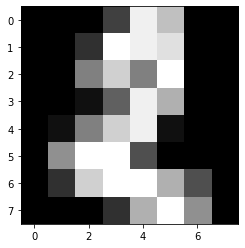

2. True value: 2, prediction: 8 -- WRONG




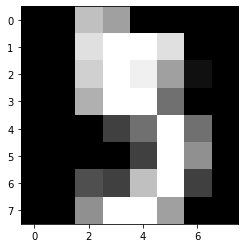

5. True value: 5, prediction: 9 -- WRONG




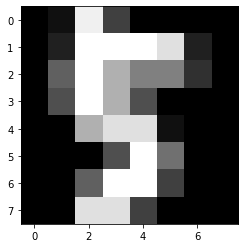

46. True value: 5, prediction: 4 -- WRONG




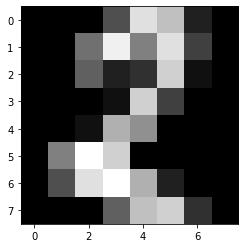

50. True value: 2, prediction: 8 -- WRONG




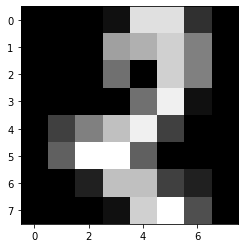

54. True value: 2, prediction: 8 -- WRONG




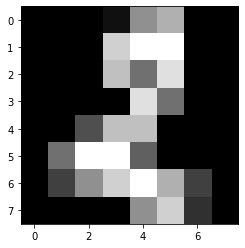

57. True value: 2, prediction: 8 -- WRONG




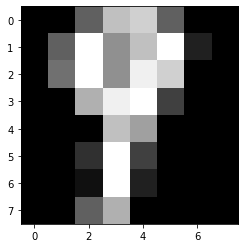

69. True value: 9, prediction: 8 -- WRONG




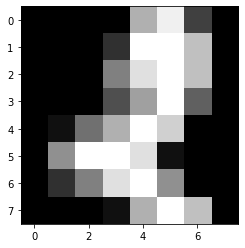

77. True value: 2, prediction: 1 -- WRONG




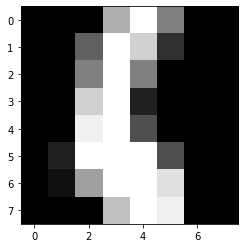

95. True value: 6, prediction: 1 -- WRONG




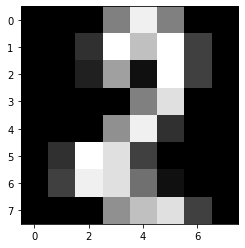

115. True value: 2, prediction: 8 -- WRONG




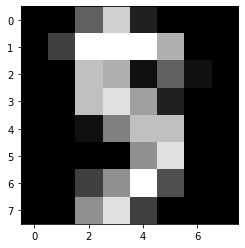

120. True value: 5, prediction: 9 -- WRONG




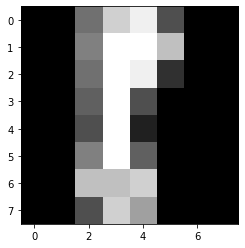

129. True value: 8, prediction: 1 -- WRONG




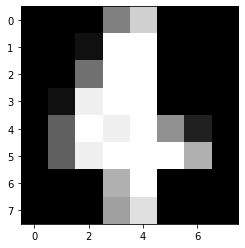

171. True value: 4, prediction: 1 -- WRONG


Performance: 166/179, 0.9273743016759777


In [ ]:
# Make predictions
print('Generating predictions...')
predictions = model.predict(x_test[:pred_num])

# Print all our predictions
wrong = 0
print('Predictions...')

for i in range(0, len(predictions)):

    left = int(y_test[i])
    right = predictions[i].tolist().index(max(predictions[i]))

    msg = '{}. True value: {}, prediction: {}'.format(i, left, right, end='')

    if left != right:

        plt.imshow(img[i], cmap='gray')
        plt.show()

        print(msg + ' -- WRONG\n\n')
        wrong += 1

print('Performance: {}/{}, {}'.format(pred_num - wrong, pred_num, (pred_num - wrong)/pred_num))


# Challenge - Making your own digit and testing it against our model!!

This time you will be making the image, and using that image we will test the effectiveness of the neural network we've created.


(8, 8, 3)


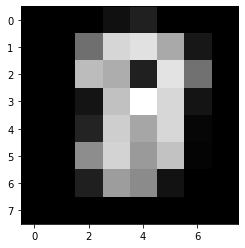

Prediction: 7


In [ ]:
from PIL import Image

path = '/content/drive/MyDrive/student resources/Challenge(Machine Learning Digits)/Student images/8Cody.png'
image = Image.open(path)

image = image.resize((8, 8))

nimg = np.array(image)

print(nimg.shape)
nimg = nimg[:,:,0]
# print(np.sum(nimg[:,:,3]))

plt.imshow(nimg, cmap='gray')
plt.show()

nimg = nimg.reshape(1, 64)

prediction = model.predict(nimg)
print('Prediction: {}'.format(prediction[0].tolist().index(max(prediction[0]))))